# 8과 [예제] 숫자 vs 숫자

## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 보스톤 시, 타운별 집값  
③ 아이리스 꽃 분류  
④ 뉴욕 공기 오염도


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 아이리스 꽃 분류
iris = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston2_NA.csv')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.0


In [5]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air.head()

,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday
0,41,190.0,7.4,67,1973-05-01,5,1
1,36,118.0,8.0,72,1973-05-02,5,2
2,12,149.0,12.6,74,1973-05-03,5,3
3,18,313.0,11.5,62,1973-05-04,5,4
4,19,NaN,14.3,56,1973-05-05,5,5


## - 시작하기 

* 우리가 사용하는 도구는...
    * 두 변수와의 관계를 살펴보기 위해, 두가지 도구(시각화, 수치화)를 이용합니다.
    * 이 도구들도 각각 한계가 있습니다. 보이는게 전부가 아님을 꼭 명심하세요! 
    * 특히 수치화 도구(가설검정 도구)는 많은 가정들이 전제 됩니다. 
    * 그래서 이번 과정에서는 그 도구를 사용하는 데에 집중합니다. 


## 2.시각화

* 상관 분석에 대해서 이야기 해봅시다.
    * 상관 분석은 연속형 변수 X에 대한 연속형 변수 Y의 관계를 분석할 때 사용됩니다.
    * Scatter를 통해 시각화 합니다.
* 가설 : 온도(x)가 상승하면 아이스크림 판매량(y)을 증가할까?
    * 어떤 관계가 보이나요?
    * 얼마나 강한 관계인가요?
* 숫자 vs 숫자를 비교할 때 중요한 관점이 **‘직선’ (Linearity)**입니다.



### 1) 산점도

* 문법
    * plt.scatter( x축 값, y축 값 )
    * plt.scatter( ‘x변수’, ‘y변수’, data = dataframe이름) 

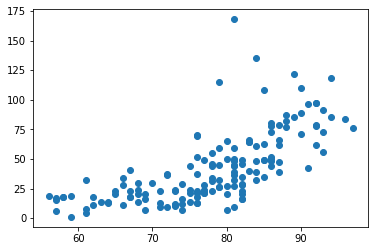

In [6]:
plt.scatter(air['Temp'], air['Ozone'])
plt.show()

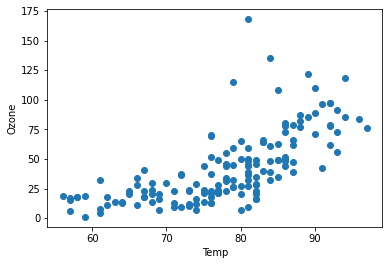

In [9]:
plt.scatter('Temp', 'Ozone', data = air)
plt.xlabel('Temp')
plt.ylabel('Ozone')
plt.show()

그래프를 그렸으면, 그래프로부터 정보를 파악해야 합니다.  

무엇이 보이나요?

직선의 관계가 있다  
양의 상관관계  
온도가 높을수록 범위가 늘어난다

### 2) Temp, Wind, Solar.R 과 Ozone 과의 관계를 시각화 해 봅시다.

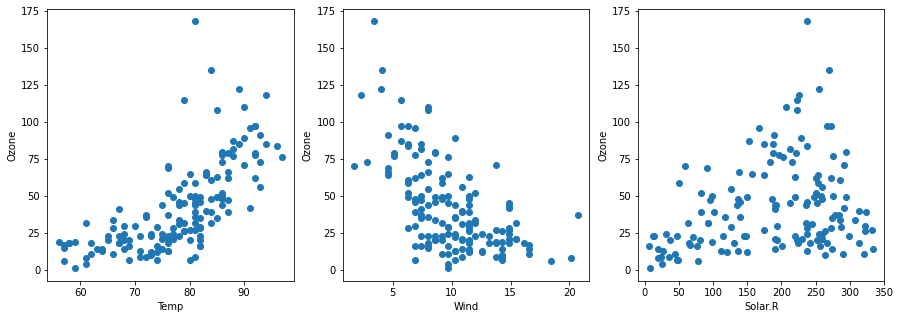

In [12]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.scatter('Temp', 'Ozone', data = air)
plt.xlabel('Temp')
plt.ylabel('Ozone')

plt.subplot(1,3,2)
plt.scatter('Wind', 'Ozone', data = air)
plt.xlabel('Wind')
plt.ylabel('Ozone')

plt.subplot(1,3,3)
plt.scatter('Solar.R', 'Ozone', data = air)
plt.xlabel('Solar.R')
plt.ylabel('Ozone')

plt.show()

Ozone과 가장 강한 관계의 x변수는?

Temp  
직선이 보이고 직선에 몰려있습니다

### 3) pairplot으로 한꺼번에 시각화 할 수 있습니다.

* 숫자형 변수들에 대한 산점도를 한꺼번에 그려줍니다.
* 그러나 **시간이 많이**걸립니다.

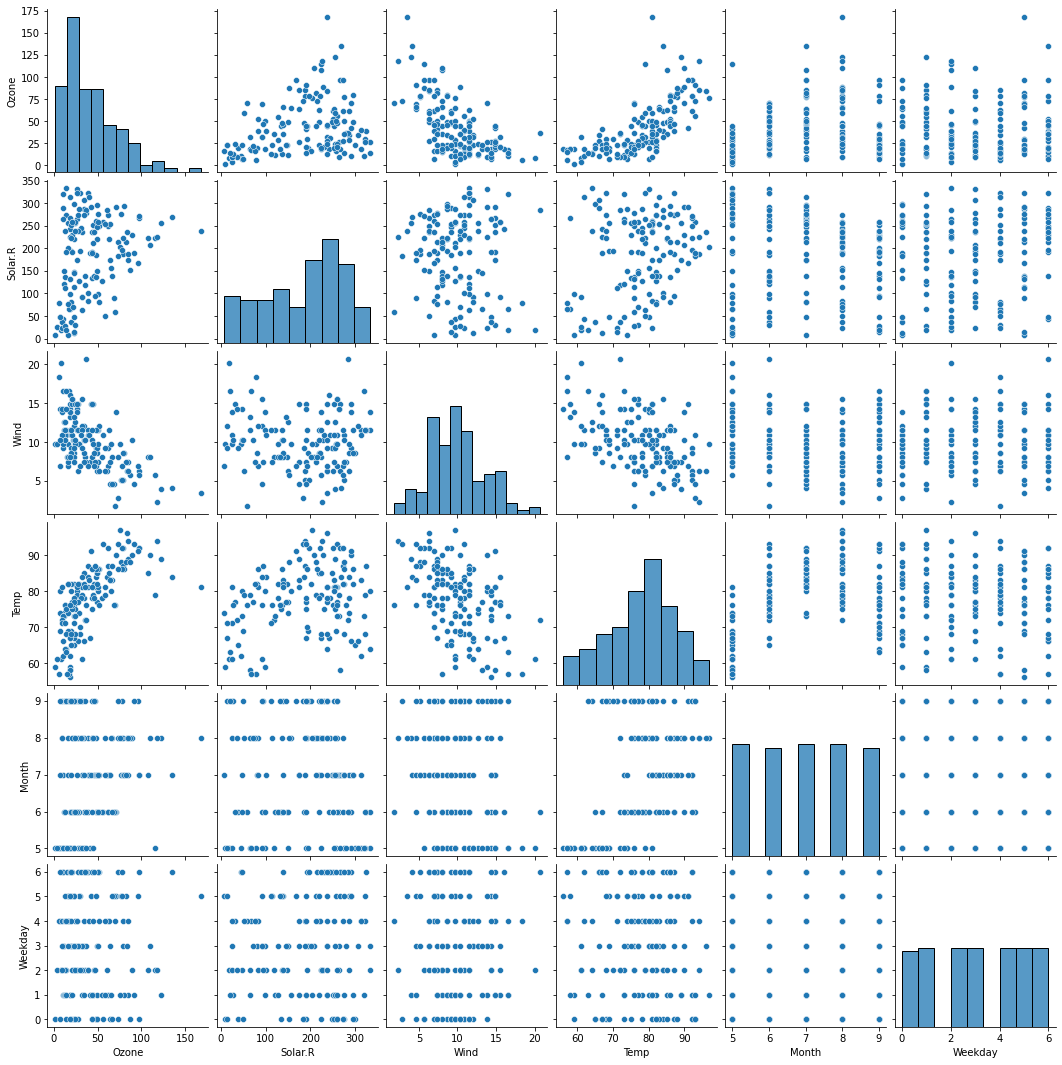

In [13]:
sns.pairplot(air)

###  4) jointplot 로 살펴보기

* jointplot은 산점도와 각각의 히스토그램을 함께 보여줍니다.

* Temp --> Ozone

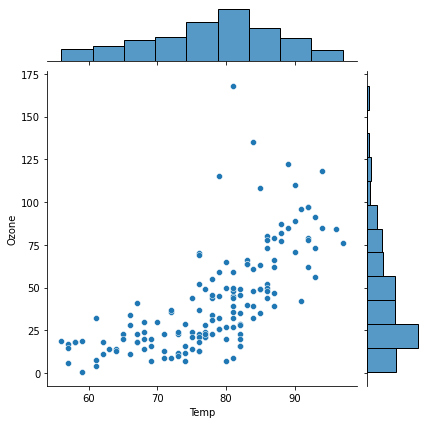

In [14]:
sns.jointplot(x='Temp', y='Ozone', data = air)
plt.show()

* Wind --> Ozone

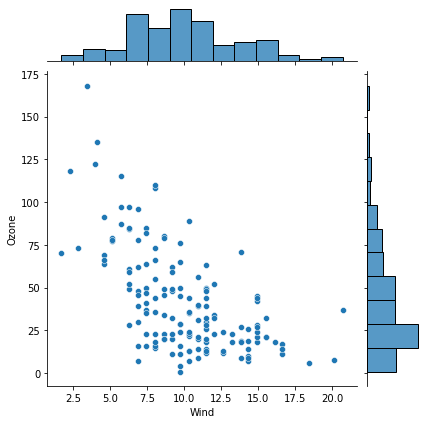

In [15]:
sns.jointplot(x='Wind', y='Ozone', data = air)
plt.show()

* Solar.R --> Ozone

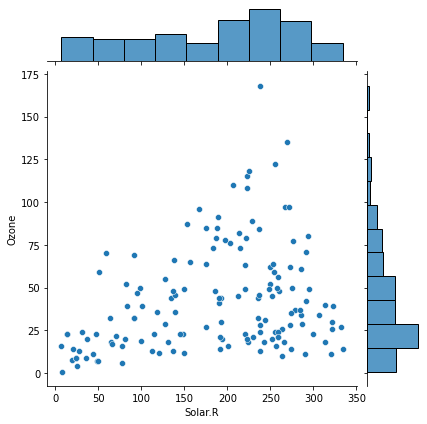

In [16]:
sns.jointplot(x='Solar.R', y='Ozone', data = air)
plt.show()

우리는 다양한 시각화를 통해서 결국은...
* x

## 3.수치화 : 상관분석

In [17]:
import scipy.stats as spst

In [18]:
# 상관계수와 p-value 
spst.pearsonr(air['Temp'], air['Ozone'])

(0.6833717861490114, 2.197769800200274e-22)

결과는 튜플로 나오는데

1. 튜플의 첫 번째 값 : 상관계수를 뜻합니다.
2. 두번째 값 : p-value
    * 귀무가설 : 상관 관계가 없다.(상관계수가 0이다.)
    * 대립가설 : 상관 관계가 있다.(상관계수가 0이 아니다.)

In [19]:
# 데이터프레임으로 부터 수치형 데이터에 대한 상관계수 구하기
air.corr()

,Ozone,Solar.R,Wind,Temp,Month,Weekday
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,-0.012900
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,0.071189
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.037313
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.032574
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,0.030261
Weekday,-0.012900,0.071189,0.037313,-0.032574,0.030261,1.000000


위 결과로 부터,
1. 같은 변수끼리 구한 값 1은 의미 없다.
2. 상관계수의 절대값이 
    * 1에 가까울 수록 강한 상관관계
    * 0에 가까울 수록 약한 상관관계
3. +는 양의 상관관계, -는 음의 상관관계 

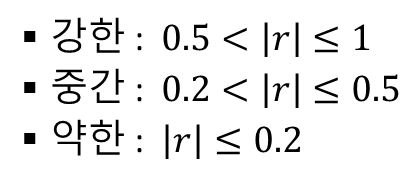

### 실습 : 상관계수
air 데이터를 이용합니다.  
* 상관관계 구하는 함수 : pearsonr() 사용할 때 주의할점.  
    * 값에 NaN이 있으면 안된다!!!

In [23]:
# air 데이터프레임에 NaN이 얼마나 있는지 확인해 봅시다.
air.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Date       0
Month      0
Weekday    0
dtype: int64

.notnull() : NaN은 빼고

In [20]:
air.loc[air['Solar.R'].notnull()]


,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday
0,41,190.0,7.4,67,1973-05-01,5,1
1,36,118.0,8.0,72,1973-05-02,5,2
2,12,149.0,12.6,74,1973-05-03,5,3
3,18,313.0,11.5,62,1973-05-04,5,4
6,23,299.0,8.6,65,1973-05-07,5,0
...,...,...,...,...,...,...,...
148,30,193.0,6.9,70,1973-09-26,9,2
149,23,145.0,13.2,77,1973-09-27,9,3
150,14,191.0,14.3,75,1973-09-28,9,4
151,18,131.0,8.0,76,1973-09-29,9,5


In [24]:
# 상관계수를 구해봅시다.
# Temp --> Ozone
print('Temp -> Ozone 상관계수: {}, pvalue : {}'.format(spst.pearsonr(air['Temp'], air['Ozone'])[0],spst.pearsonr(air['Temp'], air['Ozone'])[1]))

# Wind --> Ozone
print('Wind -> Ozone 상관계수: {}, pvalue : {}'.format(spst.pearsonr(air['Wind'], air['Ozone'])[0],spst.pearsonr(air['Wind'], air['Ozone'])[1]))

# Solar.R --> Ozone
air2 = air.loc[air['Solar.R'].notnull()]
print('Solar.R -> Ozone 상관계수: {}, pvalue : {}'.format(spst.pearsonr(air2['Solar.R'], air2['Ozone'])[0],spst.pearsonr(air2['Solar.R'], air2['Ozone'])[1]))

Temp -> Ozone 상관계수: 0.6833717861490114, pvalue : 2.197769800200274e-22
Wind -> Ozone 상관계수: -0.6054782354684075, pvalue : 1.1255146087638192e-16
Solar.R -> Ozone 상관계수: 0.2800681334905377, pvalue : 0.0006175878788566531


e-22 :10의 마이너스 22제곱  
e-16 : 10의 마이너스 16제곱

## 4.상관계수에는 한계가 있습니다.


In [25]:
ds = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/datasaurus.csv")

In [26]:
ds_names = ['dino','x_shape', 'star', 'circle', 'bullseye' ]

* 아래 5개 그룹의 수치화 결과(상관계수)를 보고 x와 y에 관계가 있는지 판단해 봅시다.

In [27]:
for i, d in enumerate(ds_names) :
    temp_ds = ds.loc[ds['dataset']==d]
    corr = spst.pearsonr(temp_ds['x'], temp_ds['y'])
    print(i)
    print('상관계수 : {:.4f},  P-value : {:.4f}'.format(corr[0], corr[1]))
    print('---------------------------------------')

0
상관계수 : -0.0645,  P-value : 0.4459
---------------------------------------
1
상관계수 : -0.0656,  P-value : 0.4381
---------------------------------------
2
상관계수 : -0.0630,  P-value : 0.4566
---------------------------------------
3
상관계수 : -0.0683,  P-value : 0.4190
---------------------------------------
4
상관계수 : -0.0686,  P-value : 0.4173
---------------------------------------


* 그렇다면, 이제 그래프들을 관찰해 봅시다. 
    * 어떤 패턴이 있나요? 아니면 아무런 패턴도 없나요?
    * 어떤 신호가 있나요? 아니면 노이즈만 있나요?

In [ ]:
enumerate(ds_names)

0 dino
상관계수 : -0.0645,  P-value : 0.4459


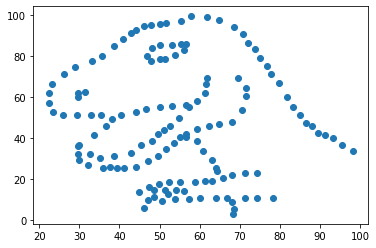

1 x_shape
상관계수 : -0.0656,  P-value : 0.4381


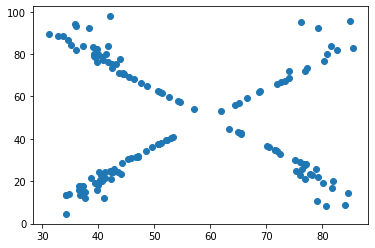

2 star
상관계수 : -0.0630,  P-value : 0.4566


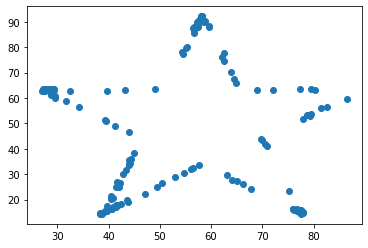

3 circle
상관계수 : -0.0683,  P-value : 0.4190


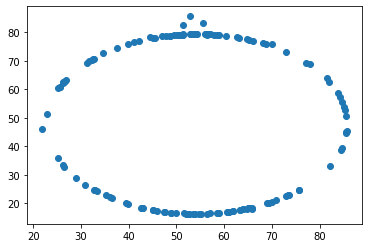

4 bullseye
상관계수 : -0.0686,  P-value : 0.4173


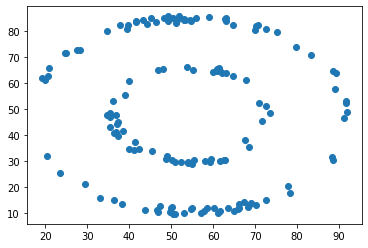

In [28]:
for i,d in enumerate(ds_names) :
    temp_ds = ds.loc[ds['dataset']==d]
    corr = spst.pearsonr(temp_ds['x'], temp_ds['y'])
    print(i, d)
    print('상관계수 : {:.4f},  P-value : {:.4f}'.format(corr[0], corr[1]))
    plt.scatter(temp_ds['x'], temp_ds['y'])
    plt.show()

* 이렇듯, 수치화해서 하나의 숫자로 요약하는 데에는 많은 장점이 있습니다. 그러나 한계도 분명히 있음을 알아야 합니다.